# Supervised Machine Learning Algorithm for Beginners

## Overview of Artificial Intelligence and Machine Learning

**Artificial intelligence (AI)** refers to machines mimicking human intelligence, aiming to **perceive**, **think**, and **problem-solve like humans**. **Machine learning (ML)** is a subset, allowing computers to **learn and advance by analyzing data**. In the realm of weak AI, both ML and big data focus on processing abundant data to uncover patterns and extract meaningful insights. Their common goal is **using existing data** to predict and assess **future scenarios**, simplifying **complex information** into **actionable knowledge**.

Before discussing machine learning in detail, let's first classify the problems solved by computers according to their **"input"** and **"output"**, as follows:

1. The input information is **precise**, requiring an **optimal solution**.
2. The input information is **precise**, but it's impossible to find an optimal solution, only a **satisfactory one**.
3. The input information is **vague**, requiring an **optimal solution**.
4. The input information is **vague**, and it's impossible to find an optimal solution, only a **satisfactory one**.

Computers excel at numerical computation and logical reasoning, the first category of problems. 

The second involves **optimization and search, common in artificial intelligence**. The objective is often finding a satisfactory solution, not necessarily the absolute best.

The third and fourth categories involve dealing with vague or incomplete information. Here, the challenge is not just about finding optimal or satisfactory solutions, but also about how to handle and interpret uncertain or incomplete data. **These types of problems are prevalent in fields like machine learning and data mining, where the input data is often not precise and the algorithms need to be capable of dealing with ambiguity and uncertainty.**

This is a built-up crash course guiding you to learn AI: https://thecrashcourse.com/topic/ai/ You can access it if you are interested in.

## Steps for Implementing Machine Learning

The general steps for successfully implementing machine learning are as follows:

1. **Data Collection:** Collect and obtain data relevant to the problem at hand, ensuring data quality and suitability.

2. **Data Preparation:** Clean, process, and transform the collected data to fit the requirements of the machine learning model, including handling missing values and outliers.

3. **Data Analysis:** Conduct exploratory data analysis (EDA) using visualization and statistical methods to gain insights into the features and distribution of the data.

4. **Training the Algorithm:** Choose an appropriate machine learning algorithm, split the data into training and validation sets, and use the training set to train the model.

5. **Testing the Algorithm:** Evaluate the performance of the model using a validation or test set, adjusting hyperparameters to enhance accuracy and generalization.

6. **Applying the Algorithm:** Apply the trained and tested model to new, unseen data to make predictions or classifications for real-world problem-solving.

In today's workshop, our focus will be on steps 4, 5, and 6 of the supervised machine learning implementation process. We will delve into algorithm training, testing, and practical application. 

## Introduction to Supervised Learning:

Supervised learning is a machine learning paradigm where an algorithm learns from labeled training data, making predictions or classifications based on input features. The algorithm refines its predictions by comparing them to known outcomes, enabling it to generalize and make accurate predictions on new, unseen data.

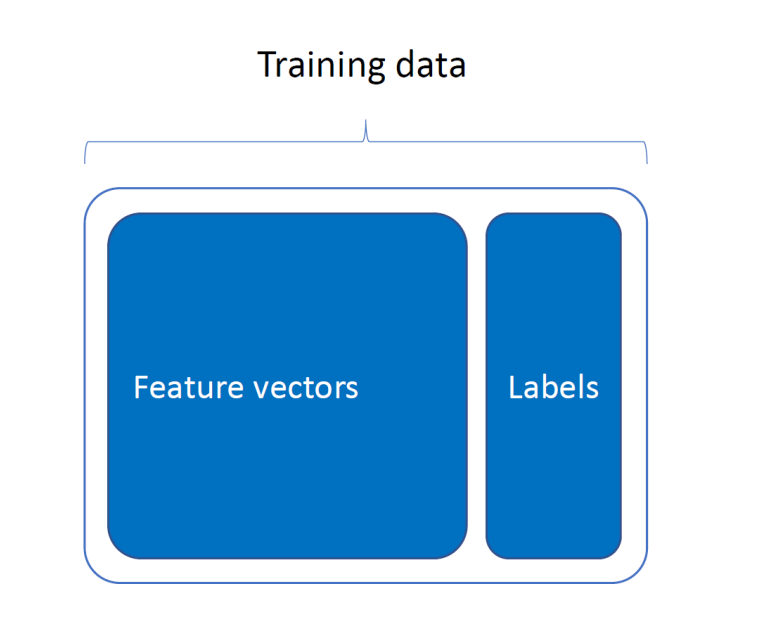

In today's workshop, we are going to introduce you two specific machine learning algorithm: **Linear Regression** and **Support Vector Machine(SVM)**.

## Linear Regression

Linear regression is a statistical method that models the relationship between a dependent variable and one or more independent variables. It assumes a linear relationship, aiming to find the best-fit line that minimizes the difference between predicted and actual values.

### Example: Penguin Flipper Length and Weight

Consider predicting a penguin's weight (`Y`) based on its flipper length (`X`). In linear regression, we seek a line (e.g., `Y = wX + b`) that best represents the trend.

Here, the slope `w` represents the weight gained per unit increase in flipper length, and the y-intercept `b` is the weight when the flipper length is zero. This equation helps predict a penguin's weight based on its flipper length.

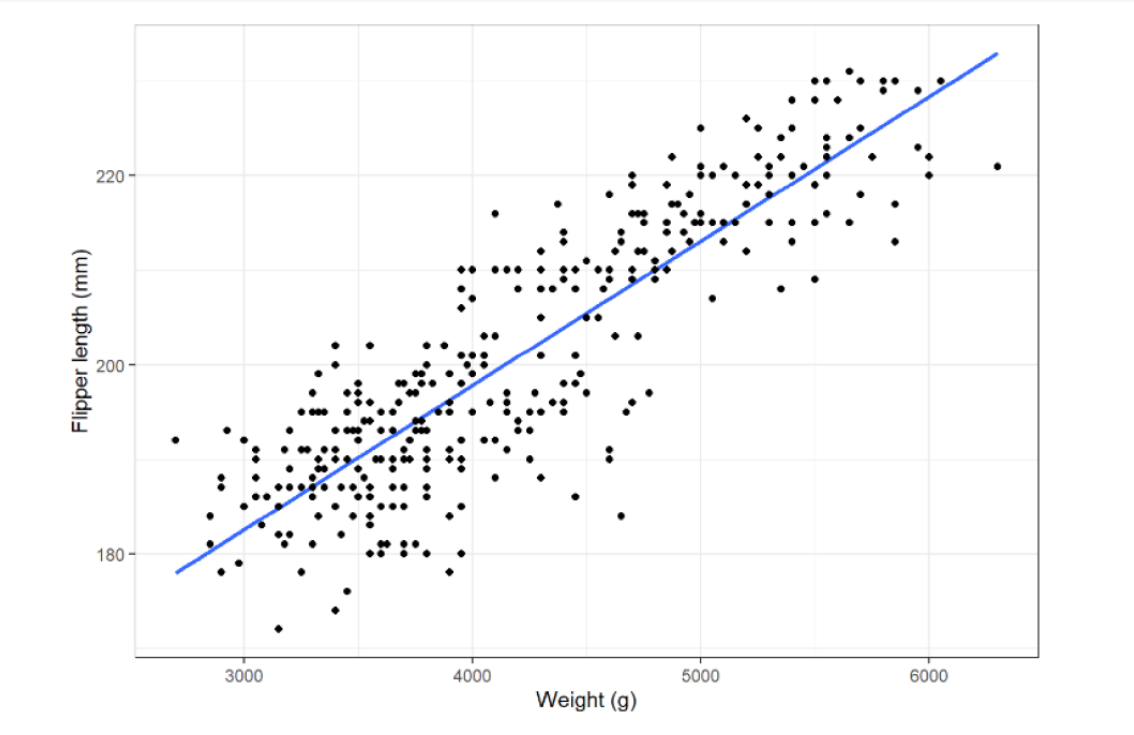

### Implementation of Linear Regression Model Learning:

1. **Objective:**
   - **Goal:** The overall objective is to learn a regression model denoted as ϕ, which is a function mapping from ℝᵈ (d-dimensional space) to ℝ (real numbers). The model is represented as ϕw, where w is a weight vector.


2. **Linear Model Form:**
   - **Linear Model ϕw(x₀):** The linear model ϕw(x₀) is defined as the inner product (dot product) between the weight vector w and the feature vector x₀. It's denoted as ⟨w, x₀⟩ and calculated as the sum of the products of corresponding components.
   - **Mathematical Form:** ϕw(x₀) = w₁ * x₀₁ + w₂ * x₀₂ + ... + wd * x₀d
   - **Components:** 
     - x₀ = (x₀₁, ..., x₀d): A d-dimensional feature vector.
     - w = (w₁, ..., wd): A d-dimensional weight vector.


3. **Learning Goal:**
   - **Data D = ((x₁, y₁), ..., (xn, yn)):** The learning process leverages a dataset D, where each data point is represented as (xi, yi). Here, xi is a feature vector, and yi is the corresponding target or output value.


4. **Objective in Learning:**
   - **Learning Weight Vector w:** The primary objective is to use the provided dataset D to learn an optimal choice of the weight vector w = (w₁, ..., wd). This optimal choice aims to minimize the difference between the predicted values (ϕw(xi)) and the actual target values (yi) in the dataset.

So, How can we find the best weight vector **w**?

Before delving into the process, it's crucial to understand the concepts of **homogeneous** and **inhomogeneous models**. In the penguin example, you noticed the presence of an additional bias term `b`. In practice, this bias term is often included to account for offsets or intercepts in the data.

We refer to the model without bias ϕw as homogonous and the model with a bias term ϕw,b as a inhomogonous.

In the case of an inhomogeneous model ϕ𝐰, which includes both weights 𝐰 and the bias term 𝑏, we can equivalently view it as a homogeneous model ϕ𝐰′ on ℝᵈ⁺¹. This is achieved by augmenting each d-dimensional feature vector 𝐱₀ = (x₀₁, ..., x₀d) with an additional dimension, resulting in an (d + 1)-dimensional vector 𝐱'₀ = (x₀₁, ..., x₀d, 1). The weight vector 𝐰 is then extended to 𝐰' = (w₁, ..., wd, 𝑏) to maintain equivalence between the two models.

**The following code realizes how to initialize the weight vector, how to add a bias term into the dataset and the weight vector.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def initialize_weights(feature_dim):
    # Initialize random weights for linear regression and reshape it into 1-dimensional vector.
    return np.random.randn(feature_dim + 1).reshape(-1, 1) # feature_dim+1 for adding the bias term into the weight vector

In [3]:
def add_bias_column(X):
    # Pad input features with a column of ones for the bias term
    paddedX = np.ones([X.shape[0], X.shape[1] + 1])
    paddedX[:, :-1] = X
    return paddedX

The performance of the model is evaluated using the expected Mean Squared Error (RMSE) on unseen test data. It is calculated as the expectation over the joint distribution P of input-output pairs (x, y)
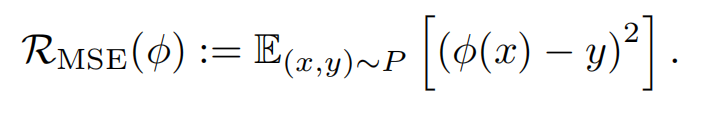

During training, the goal is to choose a model ϕ to minimize the empirical mean squared error, denoted as ˆRMSE. It is computed as the average squared difference between the model's predictions and the actual target values over the training dataset.
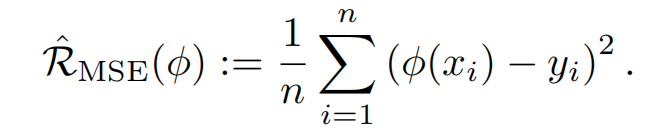

**Here is the code to calculate the empirical mean squared error.**

In [4]:
def calculate_loss(paddedX, theta, y):
    # Calculate mean squared error loss using matrix multiplication (@) for efficiency
    loss = np.mean((paddedX @ theta - y) ** 2)
    return loss

So, how can we choose a model to minimize the empirical mean squared error?

**The ordinary least squares method(OLS)** leverages the training data D = ((x1, y1), . . . ,(xn, yn)) to choose a weight vector `w` to minimise the empirical mean squared error. We can determine

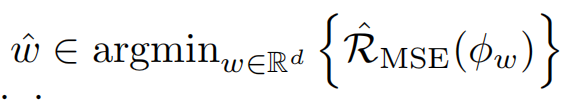

by differentiating and finding a global minimum.

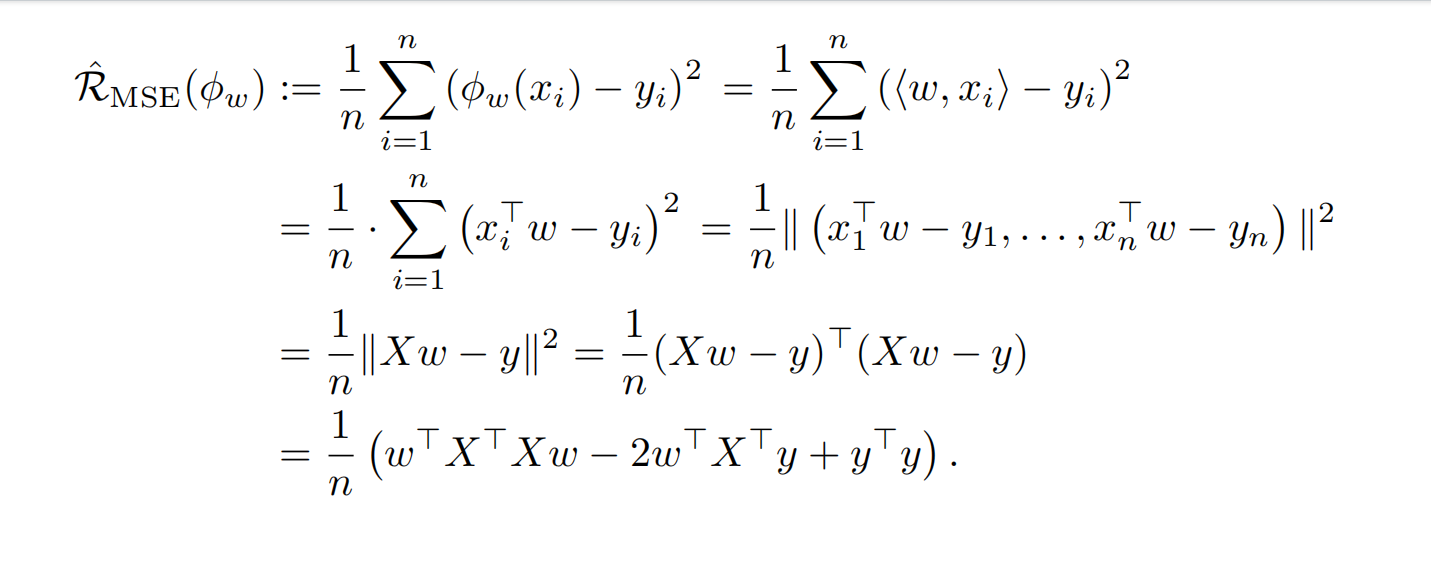

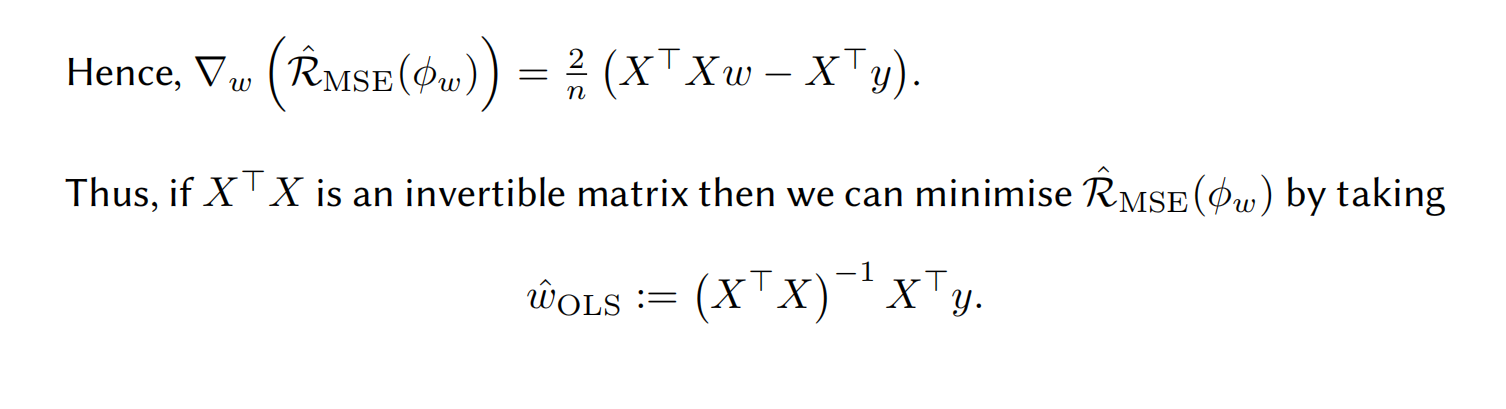

**The following code calculates the OLS weight vector.**

In [5]:
def calculate_ols_weights(X, y):
    # Calculate the weight vector using the ordinary least squares method
    theta_ols = np.linalg.inv(X.T @ X) @ X.T @ y
    return theta_ols

**The following code trains the linear regression model.**

In [6]:
def train_linear_regression(X, y):
    # Calculate OLS weights
    
    paddedX = add_bias_column(X)
    theta_ols = calculate_ols_weights(paddedX, y)
    
    # Print the initial loss
    
    initial_loss = calculate_loss(paddedX, theta_ols, y)
    print("Initial Loss:", initial_loss)

    print("OLS Weights:", theta_ols)

    return theta_ols

**Now, let's utilize the algorithm of training regression model to see the performance.**

Initial Loss: 159181.24627307768
OLS Weights: [ 4.78174122e+00  1.17058918e+01  5.03756162e+01 -6.33375928e+03]
Test Loss: 127377.94049160478


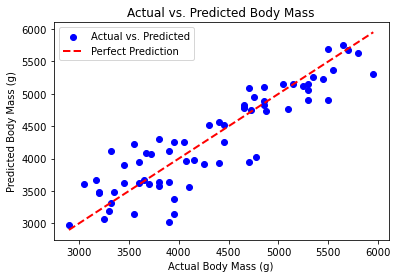

In [7]:
import seaborn as sns
from sklearn.model_selection import train_test_split

# Load the cleaned penguin dataset from seaborn
penguins = sns.load_dataset("penguins")

# Drop rows with missing values
penguins = penguins.dropna()

# Split the dataset into features (X) and target variable (y)
X = penguins[['bill_length_mm','bill_depth_mm','flipper_length_mm']]  # Features
y = penguins['body_mass_g']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

# Train the linear regression model using the provided module
theta_ols = train_linear_regression(X_train, y_train)

# You can now use the trained weights (theta_ols) for making predictions on new data
paddedX_test = add_bias_column(X_test)
y_pred = paddedX_test @ theta_ols

# Calculate test loss
test_loss = calculate_loss(paddedX_test, theta_ols, y_test)
print("Test Loss:", test_loss)

# Plot predictions vs. real values
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Body Mass (g)')
plt.ylabel('Predicted Body Mass (g)')
plt.title('Actual vs. Predicted Body Mass')
plt.legend()
plt.show()

## SVM

### Support Vector Machine (SVM) Principles:

Support Vector Machine (SVM) is a common binary classification model. The goal of SVM is to find a hyperplane (or decision boundary) in the dataset that separates two different classes while maximizing the distance between the hyperplane and the nearest data points of each class. This achieves the purpose of classifying unknown data.

Let's consider the challenge of binary classification. Let's suppose we have a data set $\mathcal{D}=((x_1,y_1),\ldots,(x_n,y_n))$ consisting of feature vectors $x_i \in R^d$ and binary labels $y_i \in \{-1,+1\}$. Our goal in this section will be to learn a linear classification model $\phi_{w,b}:R^d \rightarrow \{-1,0,1\}$ where $\phi_{w,b}(x)=\mathrm{sign}\left(\left\langle w,x \right\rangle +b\right)$ where
\begin{align*}
\mathrm{sign}(t)=\begin{cases} -1 &\text{ if }t<0\\ 0 &\text{ if }t=0\\ +1 &\text{ if }t>0\end{cases}
\end{align*}
Let's consider the perceptron algorithm for choosing a weight vector and a bias for a linear classification model.

The following code gives the outline for an implementation of the perceptron.

In [8]:
# NumPy for linear algebra
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [10]:
class MyClassicalPerceptronModel(BaseEstimator, ClassifierMixin):

    def __init__(self, max_iterations=1000):
        self.max_iterations = max_iterations

    def fit(self, X, y):
        self.weight = np.zeros(X.shape[1])
        self.bias = 0

        for _ in range(self.max_iterations):
            for xi, yi in zip(X, y):
                # Update weights and bias if misclassified
                if yi * (np.dot(xi, self.weight) + self.bias) <= 0:
                    self.weight += yi * xi
                    self.bias += yi

        return self

    def predict(self, X):
        # Multiply features by weight vector
        return np.sign(X @ self.weight + self.bias)

To test our perceptron algorithm let's use the following function for generating random linearly separable data.

In [12]:
def generate_linearly_seperable_classification_data(num_examples,random_state=0):

    np.random.seed(random_state)

    X=np.random.uniform(0, 1, size=(num_examples,2))
    y=np.sign(X[:,0]+X[:,1]-1)

    return X,y

In addition, copy the following function for plotting the decision boundary in classification problems.

In [13]:
def plot_decision_boundary(clf, X, y, cmap='Paired_r',
    bandwidth=0.01,size=4,linewidth=0.25,alpha=0.25):

    # adapted from similar function by Richard Johansson

    a_min, a_max = X[:,0].min() - 10*bandwidth, X[:,0].max() + 10*bandwidth
    b_min, b_max = X[:,1].min() - 10*bandwidth, X[:,1].max() + 10*bandwidth
    aa, bb = np.meshgrid(np.arange(a_min, a_max, bandwidth),
                         np.arange(b_min, b_max, bandwidth))
    Z = clf.predict(np.c_[aa.ravel(), bb.ravel()])
    Z = Z.reshape(aa.shape)

    plt.figure(figsize=(size,size))
    plt.contourf(aa, bb, Z, cmap=cmap, alpha=alpha)
    plt.contour(aa, bb, Z, colors='k', linewidths=linewidth)
    plt.scatter(X[:,0], X[:,1], c=y, cmap=cmap, edgecolors='k')
    plt.show()

Next run the following test code to evaluate the perceptron model ``MyClassicalPerceptronModel``

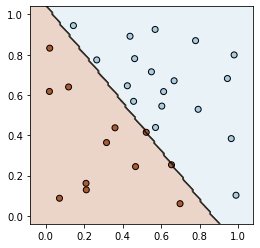

In [14]:
data_set = generate_linearly_seperable_classification_data(30)

X, y = data_set

perceptron_model=MyClassicalPerceptronModel()
perceptron_model.fit(X,y)

plot_decision_boundary(perceptron_model, X, y)

Next we continue our investigation into  binary classification. As in the previous section we suppose we have a data set $\mathcal{D}=((x_1,y_1),\ldots,(x_n,y_n))$ consisting of feature vectors $x_i \in R^d$ and binary labels $y_i \in \{-1,+1\}$. Let's suppose our goal is to learn a classification rule for a linear model of the form $\hat{\phi}_{\hat{w},\hat{b}}(x):=\mathrm{sign}\left( \left\langle \hat{w},x\right\rangle +\hat{b}\right)$.

Now we will look at how to optimise the soft-margine SVM. We use a form of gradient descent. Suppose we want to locate an approximate minimum for a differentiable function $f:R^d \rightarrow R$. The gradient is the vector $\nabla f(w):=\left( \frac{\partial f(w)}{\partial w_1},\ldots,\frac{\partial f(w)}{\partial w_d}\right)^\top$.

The gradient descent method starts with a random guess and then moves greedily in the direction of steepest descent, which corresponds to the negative gradient of our function.

Thus, we begin with a random vector $w_0 \in R^d$. Then iterations $t \in \{1,\ldots,T\}$ we move from $w_{t-1}$ to $w_t$ where
$w_t:=w_{t-1}-\eta \cdot \nabla f(w_{t-1})$.

You will notice that the gradient is rescaled by an amount $\eta>0$. This quantity is known as the learning rate and controls the distance travelled within each update, before we recompute the gradient and move onto the next step.

Let's investigate how to do this in Python with a simple example.

We will make use of the PyTorch library

In [15]:
# PyTorch for automatic differentiation
import torch

class MySGDSVMModel(BaseEstimator,ClassifierMixin):

    def __init__(self,weight_decay=0.1,num_iterations=1000,learning_rate=1,
                 mini_batch_size=32,random_state=0):

        # initialise parameters
        self.weight_decay=weight_decay
        self.num_iterations=num_iterations
        self.learning_rate=learning_rate
        self.random_state=random_state
        self.mini_batch_size=mini_batch_size

    def fit(self, X, y):

        num_examples,num_features=X.shape

        # set random seed for reproducibility
        np.random.seed(self.random_state)

        # generate random weight and bias
        w=np.random.normal(size=num_features)
        b=np.random.uniform(1)

        # convert weight and bias to torch tensor for gradient computation
        w=torch.tensor(w,requires_grad=True)
        b=torch.tensor(b,requires_grad=True)

        # convert data to torch tensor format
        X=torch.tensor(X)
        y=torch.tensor(y)

        # start stochastic gradient descent

        for i in range(self.num_iterations):

            # sample random indices
            random_indices=np.random.choice(num_examples,self.mini_batch_size)

            # extract random indices
            X_batch, y_batch = X[random_indices],y[random_indices]

            # compute regularised hinge loss
            score= X_batch @ w + b
            average_hinge_loss=torch.mean(torch.maximum(1-score*y_batch,
                                             torch.zeros(self.mini_batch_size)))

            regularised_loss = average_hinge_loss+self.weight_decay*torch.dot(w,w)

            # compute the noisy gradient of the regularised loss
            regularised_loss.backward()

            # move in the negative direction of the noisy gradient
            w.data = w.data - self.learning_rate* w.grad
            b.data = b.data - self.learning_rate*b.grad


            # zero out gradients ready for the next iteration
            w.grad.detach()
            b.grad.detach()
            w.grad.zero_()
            b.grad.zero_()


        self.weight=w.detach().numpy()
        self.bias=b.detach().numpy()

        # Return the SVM model
        return self

    def predict(self, X):

        # multiply features by weight vector
        return np.sign(X@self.weight+self.bias)

An important hyper-parameter for any learning algorithm which leverages stochastic sub-gradient descent is the learning rate.

Using the code below find a learning rate which allows your SVM model to converge to a reasonable solution.

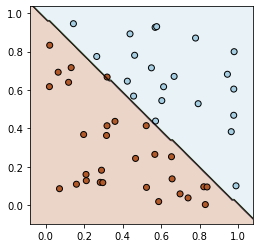

In [16]:
np.random.seed(1)

X,y = generate_linearly_seperable_classification_data(50)

svm_model = MySGDSVMModel(weight_decay=0.001,num_iterations=100,
                  learning_rate= 4.9,
                  mini_batch_size=32,random_state=0)

svm_model_with_standardised_features=Pipeline(
    [('standardscaler', StandardScaler()), ("svm",svm_model)]
)

svm_model_with_standardised_features.fit(X,y)

plot_decision_boundary(svm_model_with_standardised_features, X, y)